In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0c971a0d6f4f00bb33b96f76c082941e


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | krasnoselkup
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | mahebourg
Processing Record 6 of Set 1 | neuquen
Processing Record 7 of Set 1 | evensk
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | wulanhaote
City not found. Skipping...
Processing Record 11 of Set 1 | soe
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | port lincoln
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | riyadh
Processing Record 16 of Set 1 | beloha
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | borzya
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | lata
Processing Record 22 of Set 1 | fortuna
P

Processing Record 37 of Set 4 | yatou
Processing Record 38 of Set 4 | tikrit
Processing Record 39 of Set 4 | korla
Processing Record 40 of Set 4 | barcelona
Processing Record 41 of Set 4 | sorong
Processing Record 42 of Set 4 | nantucket
Processing Record 43 of Set 4 | mandalgovi
Processing Record 44 of Set 4 | cidreira
Processing Record 45 of Set 4 | mumford
Processing Record 46 of Set 4 | port alfred
Processing Record 47 of Set 4 | tayshet
Processing Record 48 of Set 4 | chara
Processing Record 49 of Set 4 | altay
Processing Record 50 of Set 4 | glubokoe
City not found. Skipping...
Processing Record 1 of Set 5 | beidao
Processing Record 2 of Set 5 | akyab
Processing Record 3 of Set 5 | clyde river
Processing Record 4 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 5 of Set 5 | santa cruz
Processing Record 6 of Set 5 | puerto escondido
Processing Record 7 of Set 5 | mikhaylovka
Processing Record 8 of Set 5 | northam
Processing Record 9 of Set 5 | gillette
Process

Processing Record 27 of Set 8 | khonuu
City not found. Skipping...
Processing Record 28 of Set 8 | nanzhang
Processing Record 29 of Set 8 | karimnagar
Processing Record 30 of Set 8 | tiksi
Processing Record 31 of Set 8 | fort morgan
Processing Record 32 of Set 8 | la primavera
Processing Record 33 of Set 8 | new bern
Processing Record 34 of Set 8 | miles city
Processing Record 35 of Set 8 | colombia
Processing Record 36 of Set 8 | jiddah
City not found. Skipping...
Processing Record 37 of Set 8 | kodinsk
Processing Record 38 of Set 8 | mopti
Processing Record 39 of Set 8 | nanortalik
Processing Record 40 of Set 8 | guayaramerin
Processing Record 41 of Set 8 | skjervoy
Processing Record 42 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 43 of Set 8 | manyana
Processing Record 44 of Set 8 | soldatskiy
City not found. Skipping...
Processing Record 45 of Set 8 | grindavik
Processing Record 46 of Set 8 | milas
Processing Record 47 of Set 8 | buchanan
Processing Record 48 

Processing Record 14 of Set 12 | sorvag
City not found. Skipping...
Processing Record 15 of Set 12 | loa janan
Processing Record 16 of Set 12 | camacupa
Processing Record 17 of Set 12 | moussoro
Processing Record 18 of Set 12 | port blair
Processing Record 19 of Set 12 | gisborne
Processing Record 20 of Set 12 | jiujiang
Processing Record 21 of Set 12 | egvekinot
Processing Record 22 of Set 12 | gazanjyk
Processing Record 23 of Set 12 | pontiac
Processing Record 24 of Set 12 | katsuura
Processing Record 25 of Set 12 | sept-iles
Processing Record 26 of Set 12 | male
Processing Record 27 of Set 12 | saleaula
City not found. Skipping...
Processing Record 28 of Set 12 | gwadar
Processing Record 29 of Set 12 | resistencia
Processing Record 30 of Set 12 | opuwo
Processing Record 31 of Set 12 | dzhebariki-khaya
Processing Record 32 of Set 12 | kermanshah
Processing Record 33 of Set 12 | nortelandia
Processing Record 34 of Set 12 | benton harbor
Processing Record 35 of Set 12 | kuching
Process

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Krasnoselkup,65.70,82.47,34.97,98,100,2.89,RU,2020-04-21 15:31:31
1,Tuktoyaktuk,69.45,-133.04,3.20,84,90,19.46,CA,2020-04-21 15:21:54
2,Chuy,-33.70,-53.46,72.34,66,3,8.84,UY,2020-04-21 15:22:21
3,Bilibino,68.05,166.44,0.46,88,90,0.83,RU,2020-04-21 15:31:31
4,Mahebourg,-20.41,57.70,77.00,69,20,11.41,MU,2020-04-21 15:19:15
5,Neuquen,-38.95,-68.06,57.20,44,100,8.05,AR,2020-04-21 15:22:26
6,Evensk,61.95,159.23,15.33,89,86,6.11,RU,2020-04-21 15:31:32
7,Albany,42.60,-73.97,51.01,66,90,16.11,US,2020-04-21 15:21:56
8,Qaanaaq,77.48,-69.36,21.06,93,100,5.23,GL,2020-04-21 15:22:05
9,Soe,-9.86,124.28,67.87,83,9,4.63,ID,2020-04-21 15:31:32


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [10]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Krasnoselkup,RU,2020-04-21 15:31:31,65.70,82.47,34.97,98,100,2.89
1,Tuktoyaktuk,CA,2020-04-21 15:21:54,69.45,-133.04,3.20,84,90,19.46
2,Chuy,UY,2020-04-21 15:22:21,-33.70,-53.46,72.34,66,3,8.84
3,Bilibino,RU,2020-04-21 15:31:31,68.05,166.44,0.46,88,90,0.83
4,Mahebourg,MU,2020-04-21 15:19:15,-20.41,57.70,77.00,69,20,11.41
...,...,...,...,...,...,...,...,...,...
568,Lakes Entrance,AU,2020-04-21 15:32:50,-37.88,147.98,48.99,89,3,8.84
569,Barra Da Estiva,BR,2020-04-21 15:32:50,-13.63,-41.33,74.01,56,81,4.63
570,Iquitos,PE,2020-04-21 15:31:24,-3.75,-73.25,87.80,58,79,3.36
571,Indian Head,US,2020-04-21 15:32:51,38.60,-77.16,64.00,67,20,5.82


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/21/20'

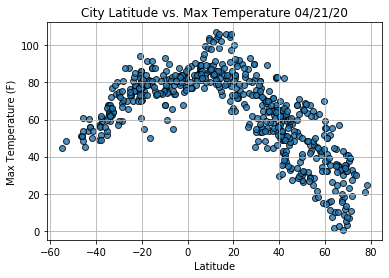

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

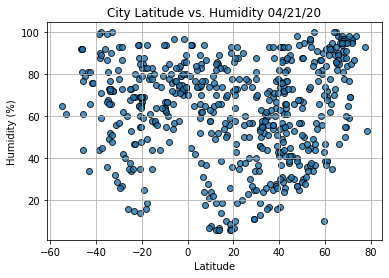

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

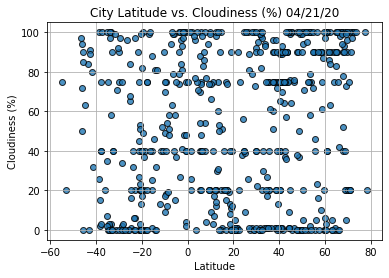

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

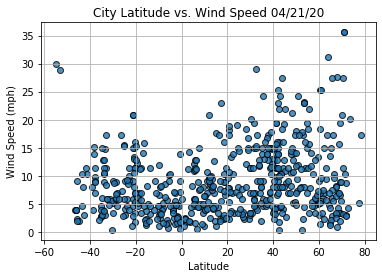

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [32]:
index13 = city_data_df.loc[13]
index13

City                       Riyadh
Country                        SA
Date          2020-04-21 15:18:42
Lat                         24.69
Lng                         46.72
Max Temp                     78.8
Humidity                       50
Cloudiness                     40
Wind Speed                   8.05
Name: 13, dtype: object

In [33]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
568    False
569    False
570    False
571     True
572     True
Name: Lat, Length: 573, dtype: bool

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Krasnoselkup,RU,2020-04-21 15:31:31,65.70,82.47,34.97,98,100,2.89
1,Tuktoyaktuk,CA,2020-04-21 15:21:54,69.45,-133.04,3.20,84,90,19.46
3,Bilibino,RU,2020-04-21 15:31:31,68.05,166.44,0.46,88,90,0.83
6,Evensk,RU,2020-04-21 15:31:32,61.95,159.23,15.33,89,86,6.11
7,Albany,US,2020-04-21 15:21:56,42.60,-73.97,51.01,66,90,16.11


In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

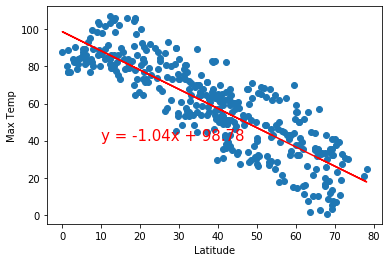

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

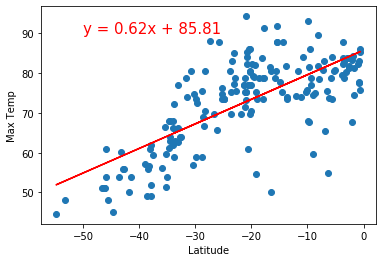

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

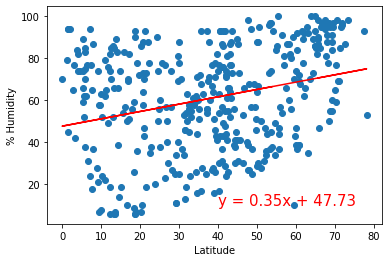

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

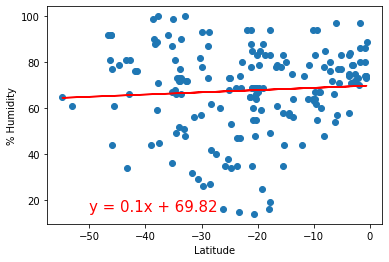

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

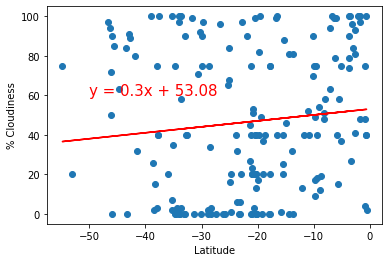

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

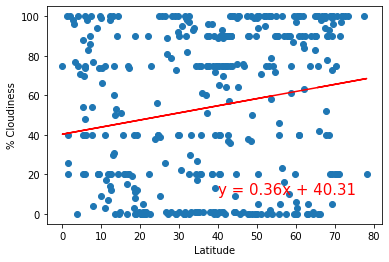

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

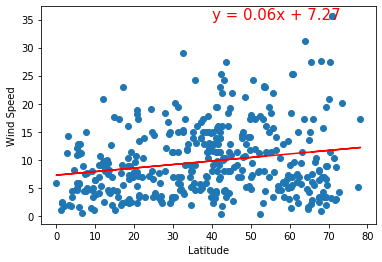

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

In [1]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed', 'Wind Speed',(-50,35))

SyntaxError: EOL while scanning string literal (<ipython-input-1-1886f1cbf50a>, line 6)